In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Temp vs Signal Magnitude for Rb-87 and Rb-85 ##

In [215]:
temp = [50, 49, 48, 46, 44, 43, 42, 41, 40, 39, 38, 37]
amplitude_85 = [3.5, 4.1, 4.1, 4.1, 4.2, 4.2, 3.9, 3.8, 3.6, 2.2, 2.1, 2]
amplitude_87 = [2.5, 3.1, 3.1, 3.2, 3.3, 3.9, 2.5, 2.5, 2.2, 1.2, 1.1, 1]

print(len(temp), len(amplitude_85), len(amplitude_87))

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(temp, amplitude_85, label = "Rb-85")
ax.scatter(temp, amplitude_87, label = "Rb-87")
ax.set_title("Temperature vs Signal Magnitude (Amplitude)")
ax.set_xlabel(r"Temperature [$^\circ C$]")
ax.set_ylabel("Signal Magnitude")
ax.legend(fontsize = 15)

12 12 12


## Freq vs Current Normal Polarity ##

In [171]:
import scipy.optimize
import scipy.stats
from scipy.stats import chisquare
from scipy.optimize import curve_fit

def line(x, m, b):
    return m*x + b

In [305]:
current_set = np.array([.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3]) #amps

freq_85 = np.array([1.9944, 2.1898, 2.4038, 2.6118, 2.7959, 2.9799, 3.1749, 3.3769, 3.6004, 3.765, 3.914, 4.1395, 4.3364, 4.5335, 4.758]) #MHz
voltage_85 = np.array([-9.1866, -10.1424, -11.2101, -12.2382, -13.1586, -14.2528, -15.2324, -16.2133, -17.2544, -18.2312, -19.2160, -20.3036, -21.2309, -22.2560, -23.2745]) #mV

freq_87 = np.array([2.9798, 3.2788, 3.6028, 3.9138, 4.1899, 4.4749, 4.7729, 5.1373, 5.4923, 5.7802, 6.0245, 6.3465, 6.608, 6.901, 7.2108]) #MHz
voltage_87 = np.array([-9.1528, -10.1387, -11.2100, -12.2385, -13.1584, -14.2528, -15.2324, -16.3054, -17.2839, -18.2303, -19.2158, -20.3044, -21.2296, -22.2544, -23.2770]) #mV

shunt_R = 0.01 #ohms
##########Freq ERROR ######
sigma_f = 0.001 #MHz
#########################

I_85 = (voltage_85*1e-3 / shunt_R) #Amps
I_87 = (voltage_87*1e-3 / shunt_R) #Amps

print(I_85)
##########Fitting#########
params85, cov85 = curve_fit(line, I_85, freq_85, sigma = np.ones(len(freq_85))*sigma_f)
params87, cov87 = curve_fit(line, I_87, freq_87, sigma = np.ones(len(freq_85))*sigma_f)
x85 = np.linspace(I_85[14], I_85[0], 100)
x87 = np.linspace(I_87[14], I_87[0], 100)
##########################


###########CHI-SQUARE############
x85_ = np.linspace(I_85[14], I_85[0], 15)
x87_ = np.linspace(I_87[14], I_87[0], 15)
ob85 = np.array(freq_85)
ex85 = np.array(line(x85_, *params85))

ob87 = np.array(freq_87)
ex87 = np.array(line(x87_, *params87))

chi_sq85 = sum( (ob85 - ex85)**2/ex85 )
#print(chi_sq)
red_chi85 = chi_sq85/(len(freq_85) - 2)
#print(red_chi)

chi_sq87 = sum( (ob87 - ex87)**2/ex87 )
red_chi87 = chi_sq87/(len(freq_87) - 2)

print("CHI SQ:")
print("------------------------------------------------")
print(f"R-85: {chi_sq85} & {red_chi85}")
print(f"R-87: {chi_sq87} & {red_chi87}")
print("------------------------------------------------")

#################################

#########ERROR Residual#########
residual85 = np.array(freq_85) - line(np.linspace(I_85[0], I_85[14], 15), *params85)
residual87 = np.array(freq_87) - line(np.linspace(I_85[0], I_85[14], 15), *params87)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))
ax1.set_title("Current vs Residual (Rb-85)", fontsize = 18)
ax1.set_ylabel("Residual Frequency [MHz]", fontsize = 15)
ax1.set_xlabel("Hemholtz Current [A]", fontsize = 15)
ax1.errorbar(I_85, residual85, yerr = np.ones(len(freq_85))*sigma_f, fmt = "o", capsize = 3, label = "Data")
ax1.axhline(y = 0, color = 'red', ls = ":", label = "0 MHz Residual")
ax1.grid(True)
ax1.legend(fontsize = 18)

ax2.set_title("Current vs Residual (Rb-87)", fontsize = 18)
ax2.set_ylabel("Residual Frequency [MHz]", fontsize = 15)
ax2.set_xlabel("Hemholtz Current [A]", fontsize = 15)
ax2.errorbar(I_87,residual87, yerr = np.ones(len(freq_85))*sigma_f, fmt = "o", capsize = 3, label = "Data")
ax2.axhline(y = 0, color = 'red', ls = ":", label = "0 MHz Residual")
ax2.grid(True)
ax2.legend(fontsize = 18)

######################
sigma_f85 = np.sqrt(sum(residual85**2)/(len(freq_85-2)))  #np.mean(abs(residual85))
sigma_f87 = np.sqrt(sum(residual87**2)/(len(freq_87-2)))

print("NEW ERROR: ")
print("-----------------------------------------------")
print(f"R-85 Freq Error: {sigma_f85}")
print(f"R-87 Freq Error: {sigma_f87}")
print("-----------------------------------------------")

###########Reduced CHI-SQUARE############
x85_ = np.linspace(I_85[0], I_85[14], 15)
x87_ = np.linspace(I_87[0], I_87[14], 15)
ob85 = np.array(freq_85)
ex85 = np.array(line(x85_, *params85))

ob87 = np.array(freq_87)
ex87 = np.array(line(x87_, *params87))

chi_sq85 = sum( (ob85 - ex85)**2/sigma_f85**2 )
#print(chi_sq)
red_chi85 = chi_sq85/(len(freq_85) - 2)
#print(red_chi)

chi_sq87 = sum( (ob87 - ex87)**2/sigma_f87**2 )
red_chi87 = chi_sq87/(len(freq_87) - 2)

print("Reduced CHI SQ:")
print("------------------------------------------------")
print(f"R-85: {chi_sq85} & {red_chi85}")
print(f"R-87: {chi_sq87} & {red_chi87}")
print("------------------------------------------------")

#################################

##########Fitting AGAIN #########
params85, cov85 = curve_fit(line, I_85, freq_85, sigma = np.ones(len(freq_85))*sigma_f85)
params87, cov87 = curve_fit(line, I_87, freq_87, sigma = np.ones(len(freq_85))*sigma_f87)
##########################

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))
ax1.set_title("Current vs Resonant Frequency (Rb-85)", fontsize = 18)
ax1.set_ylabel("Frequency [MHz]", fontsize = 15)
ax1.set_xlabel("Hemholtz Current [A]", fontsize = 15)
ax1.errorbar(I_85, freq_85, yerr = np.ones(len(freq_85))*sigma_f85, fmt = "o", capsize = 3, label = "Data")
ax1.plot(x85, line(x85, *params85), color = 'red', label = "Linear Fit")
ax1.grid(True)
ax1.legend(fontsize = 18)

ax2.set_title("Current vs Resonant Frequency (Rb-87)", fontsize = 18)
ax2.set_ylabel("Frequency [MHz]", fontsize = 15)
ax2.set_xlabel("Hemholtz Current [A]", fontsize = 15)
ax2.errorbar(I_87,freq_87, yerr = np.ones(len(freq_85))*sigma_f87, fmt = "o", capsize = 3, label = "Data")
ax2.plot(x87, line(x87, *params87), color = 'red', label = "Linear Fit")
ax2.grid(True)
ax2.legend(fontsize = 18)



#######Earth B Field with RF turned off: #######
rfOff_current = 0.065 #amps
bEarth_rfOff = .9e-2 * (135*rfOff_current/(27.5e-2))
print(f"With RF turned off earth b field is {bEarth_rfOff}")

print(f"Slope: {params85[0]} ± {cov85[0][0]}")

[-0.91866 -1.01424 -1.12101 -1.22382 -1.31586 -1.42528 -1.52324 -1.62133
 -1.72544 -1.82312 -1.9216  -2.03036 -2.12309 -2.2256  -2.32745]
CHI SQ:
------------------------------------------------
R-85: 14.213091013263583 & 1.0933146933279678
R-87: 22.93714055468397 & 1.7643954272833824
------------------------------------------------
NEW ERROR: 
-----------------------------------------------
R-85 Freq Error: 0.01751720045182471
R-87 Freq Error: 0.03230188348038499
-----------------------------------------------
Reduced CHI SQ:
------------------------------------------------
R-85: 15.000000000000005 & 1.1538461538461542
R-87: 15.3995473602377 & 1.1845805661721307
------------------------------------------------
With RF turned off earth b field is 0.28718181818181815
Slope: -1.93501057984134 ± 0.00011139673936096761


# Calculations #

### Nuclear Spin ####

NEW ERROR: 
-----------------------------------------------
R-85 Freq Error: 0.062126260344484575
R-87 Freq Error: 0.06998441520026458
-----------------------------------------------
2.4896092537569503 2.5
1.4683812260955544 1.5
RESULT: 
--------------------------------------------------------------
R-85 Nuclear Spin: 2.4896092537569503 ± 0.01430905120328581
R-85 Nuclear Spin: 1.4683812260955544 ± 0.006546845031175004
--------------------------------------------------------------
CHI SQ:
------------------------------------------------
R-85: 16.086701678422582 & 1.2374385906478909
R-87: 24.91489183608092 & 1.9165301412369937
------------------------------------------------
Weighted CHI SQ:
------------------------------------------------
R-85: 15.000000004193963 & 1.1538461541687663
R-87: 15.000000015288489 & 1.1538461550221915
------------------------------------------------


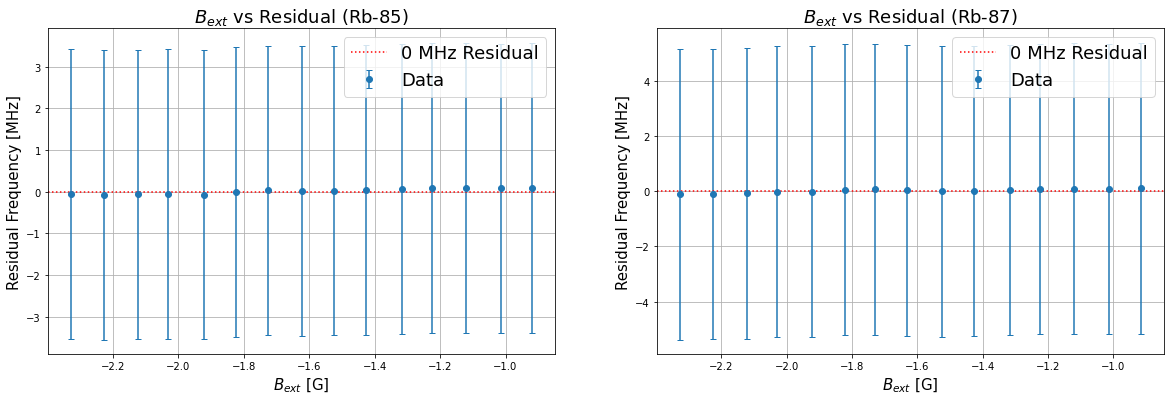

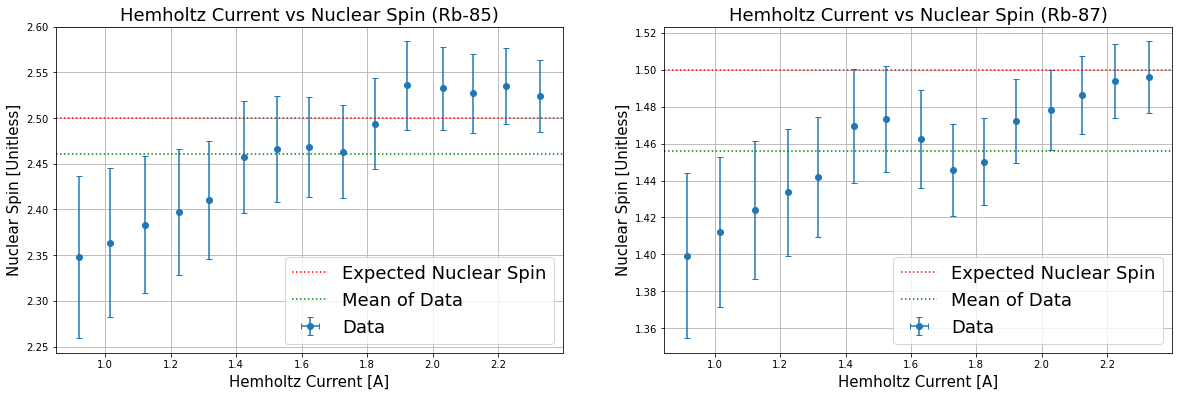

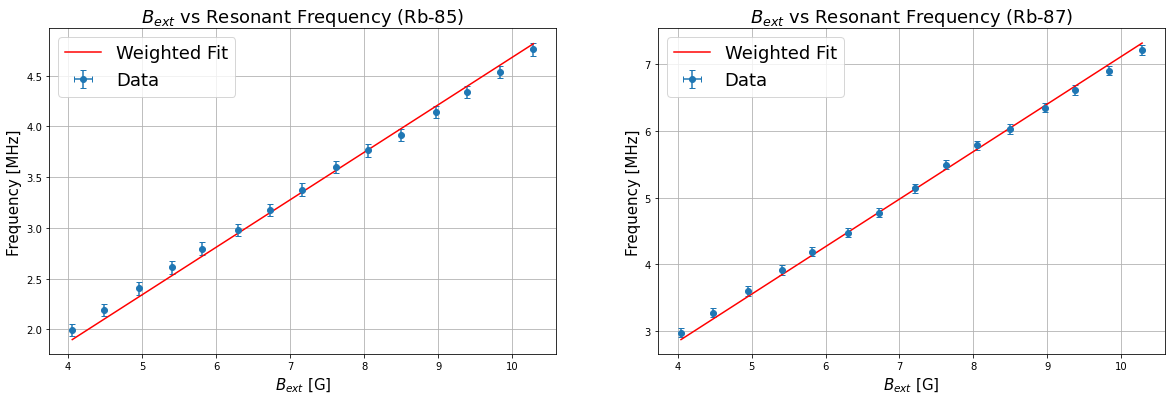

In [309]:
####### R - 85  & R - 87 ##########
sigma_f85_ = sigma_f85
sigma_f87_ = sigma_f87
const = (.9e-2)*135/(27.5e-2)
b_ext = const * current_set

b_ext85 = const * abs(I_85)
b_ext87 = const * abs(I_87)

nucSpin85_arr = 1/2 * ( ((2.799*b_ext85)/freq_85) - 1 )
nucSpin87_arr = 1/2 * ( ((2.799*b_ext87)/freq_87) - 1 )

sigma_hemI = .05 #amps
sigma_bext = const * sigma_hemI

v_error = 0.0005 #mV
I_error = (1/(shunt_R))*v_error*1e-3
sigma_bext2 = const * I_error


#####FITTING ##########
def nu(x, I):
    return x * (2.799/(2*I + 1))
params_85, cov_85 = curve_fit(nu, b_ext85, freq_85, sigma = np.ones(len(freq_85))*sigma_f85)
params_87, cov_87 = curve_fit(nu, b_ext87, freq_87, sigma = np.ones(len(freq_85))*sigma_f87)
x_vals85 = np.linspace(b_ext85[0], b_ext85[14], 100)
x_vals87 = np.linspace(b_ext87[0], b_ext87[14], 100)
##########################################

#########ERROR Residual#########
x_vals_85 = np.linspace(b_ext85[0], b_ext85[14], 15)
x_vals_87 = np.linspace(b_ext87[0], b_ext87[14], 15)
residual85 = np.array(freq_85) - nu(x_vals_85, *params_85)
residual87 = np.array(freq_87) - nu(x_vals_87, *params_87)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))
ax1.set_title(r"$B_{ext}$ vs Residual (Rb-85)", fontsize = 18)
ax1.set_ylabel("Residual Frequency [MHz]", fontsize = 15)
ax1.set_xlabel(r"$B_{ext}$ [G]", fontsize = 15)
ax1.errorbar((I_85), residual85, yerr = np.ones(len(freq_85))*sigma_f85_, fmt = "o", capsize = 3, label = "Data")
ax1.axhline(y = 0, color = 'red', ls = ":", label = "0 MHz Residual")
ax1.grid(True)
ax1.legend(fontsize = 18)

ax2.set_title(r"$B_{ext}$ vs Residual (Rb-87)", fontsize = 18)
ax2.set_ylabel("Residual Frequency [MHz]", fontsize = 15)
ax2.set_xlabel(r"$B_{ext}$ [G]", fontsize = 15)
ax2.errorbar((I_87),residual87, yerr = np.ones(len(freq_85))*sigma_f87_, fmt = "o", capsize = 3, label = "Data")
ax2.axhline(y = 0, color = 'red', ls = ":", label = "0 MHz Residual")
ax2.grid(True)
ax2.legend(fontsize = 18)

######################
sigma_f85 = np.sqrt(sum(residual85**2)/(len(freq_85-2)))  #np.mean(abs(residual85))
sigma_f87 = np.sqrt(sum(residual87**2)/(len(freq_87-2)))

print("NEW ERROR: ")
print("-----------------------------------------------")
print(f"R-85 Freq Error: {sigma_f85}")
print(f"R-87 Freq Error: {sigma_f87}")
print("-----------------------------------------------")

nuc_error85 = np.sqrt( (1/2*(2.799/freq_85))**2 * sigma_bext2**2 + (1/2*((2.799*b_ext85)/freq_85**2))**2 * sigma_f85**2)
nuc_error87 = np.sqrt( (1/2*(2.799/freq_87))**2 * sigma_bext2**2 + (1/2*((2.799*b_ext87)/freq_87**2))**2 * sigma_f87**2)
############################################################

####### Nuc ERROR? ######
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))
ax1.set_title(r"Hemholtz Current vs Nuclear Spin (Rb-85)", fontsize = 18)
ax1.set_ylabel("Nuclear Spin [Unitless]", fontsize = 15)
ax1.set_xlabel(r"Hemholtz Current [A]", fontsize = 15)
ax1.errorbar(abs(I_85), nucSpin85_arr, yerr = nuc_error85, xerr = np.ones(len(freq_85))*I_error, fmt = "o", capsize = 3, label = "Data")
ax1.axhline(y = 5/2, color = 'red', ls = ':', label = "Expected Nuclear Spin")
ax1.axhline(y = np.mean(nucSpin85_arr), color = 'green', ls = ':', label = "Mean of Data")
ax1.grid(True)
ax1.legend(fontsize = 18)

ax2.set_title(r"Hemholtz Current vs Nuclear Spin (Rb-87)", fontsize = 18)
ax2.set_ylabel("Nuclear Spin [Unitless]", fontsize = 15)
ax2.set_xlabel(r"Hemholtz Current [A]", fontsize = 15)
ax2.errorbar(abs(I_87),nucSpin87_arr, yerr = nuc_error87, xerr = np.ones(len(freq_85))*I_error, fmt = "o", capsize = 3, label = "Data")
ax2.axhline(y = 3/2, color = 'red', ls = ':', label = "Expected Nuclear Spin")
ax2.axhline(y = np.mean(nucSpin87_arr), color = 'green', ls = ':', label = "Mean of Data")
ax2.grid(True)
ax2.legend(fontsize = 18)

#####FITTING AGAIN##########
def nu(x, I):
    return x * (2.799/(2*I + 1))
params_85, cov_85 = curve_fit(nu, b_ext85, freq_85, sigma = np.ones(len(freq_85))*sigma_f85)
params_87, cov_87 = curve_fit(nu, b_ext87, freq_87, sigma = np.ones(len(freq_85))*sigma_f87)
#####################################

#################### PLOTTING NUC FIT STUFF ###################
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))
ax1.set_title(r"$B_{ext}$ vs Resonant Frequency (Rb-85)", fontsize = 18)
ax1.set_ylabel("Frequency [MHz]", fontsize = 15)
ax1.set_xlabel(r"$B_{ext}$ [G]", fontsize = 15)
ax1.errorbar(b_ext85, freq_85, yerr = np.ones(15)*sigma_f85, xerr = np.ones(len(freq_85))*sigma_bext2, fmt = "o", capsize = 3, label = "Data")
ax1.plot(x_vals85, nu(x_vals85, *params_85), color = 'red', label = "Weighted Fit")
ax1.grid(True)
ax1.legend(fontsize = 18)

ax2.set_title(r"$B_{ext}$ vs Resonant Frequency (Rb-87)", fontsize = 18)
ax2.set_ylabel("Frequency [MHz]", fontsize = 15)
ax2.set_xlabel(r"$B_{ext}$ [G]", fontsize = 15)
ax2.errorbar(b_ext87,freq_87, yerr = np.ones(15)*sigma_f87, xerr = np.ones(len(freq_85))*sigma_bext2, fmt = "o", capsize = 3, label = "Data")
ax2.plot(x_vals87, nu(x_vals87, *params_87), color = 'red', label = "Weighted Fit")
ax2.grid(True)
ax2.legend(fontsize = 18)

print(*params_85, 5/2)
print(*params_87, 3/2)

print("RESULT: ")
print('--------------------------------------------------------------')
print(f"R-85 Nuclear Spin: {params_85[0]} ± {np.sqrt(cov_85[0][0])}")
print(f"R-85 Nuclear Spin: {params_87[0]} ± {np.sqrt(cov_87[0][0])}")
print('--------------------------------------------------------------')
#########################################

###########CHI-SQUARE############
x_vals_ = np.linspace(b_ext[14], b_ext[0], 15)
ob85 = np.array(freq_85)
ex85 = np.array(nu(x_vals_, *params_85))

ob87 = np.array(freq_87)
ex87 = np.array(nu(x_vals_, *params_87))

chi_sq85 = sum( (ob85 - ex85)**2/ex85 )
red_chi85 = chi_sq85/(len(freq_85) - 2)

chi_sq87 = sum( (ob87 - ex87)**2/ex87 )
red_chi87 = chi_sq87/(len(freq_87) - 2)

print("CHI SQ:")
print("------------------------------------------------")
print(f"R-85: {chi_sq85} & {red_chi85}")
print(f"R-87: {chi_sq87} & {red_chi87}")
print("------------------------------------------------")

#################################

###########Weighted CHI-SQUARE############
x_vals_85 = np.linspace(b_ext85[0], b_ext85[14], 15)
x_vals_87 = np.linspace(b_ext87[0], b_ext87[14], 15)
ob85 = np.array(freq_85)
ex85 = np.array(nu(x_vals_85, *params_85))

ob87 = np.array(freq_87)
ex87 = np.array(nu(x_vals_87, *params_87))

chi_sq85 = sum( (ob85 - ex85)**2/sigma_f85**2 )
red_chi85 = chi_sq85/(len(freq_85) - 2)

chi_sq87 = sum( (ob87 - ex87)**2/sigma_f87**2 )
red_chi87 = chi_sq87/(len(freq_87) - 2)

print("Weighted CHI SQ:")
print("------------------------------------------------")
print(f"R-85: {chi_sq85} & {red_chi85}")
print(f"R-87: {chi_sq87} & {red_chi87}")
print("------------------------------------------------")

#################################


### Magnetic Field ###

In [113]:
######## R - 85 #########
y_int85 = params85[1]
y_int85_err = np.sqrt(cov85[1][1])
nucSpin85 = 5/2
B_earth85 = y_int85*(2*nucSpin85 + 1) /2.799 #G
B85_err = y_int85_err *(2*nucSpin85 + 1) /2.799
print(f"R-85: magnetic field of earth for Rb-85 is {B_earth85} ± {B85_err} Gauss")
print()
######## R - 87 #############
y_int87 = params87[1]
y_int87_err = np.sqrt(cov87[1][1])
nucSpin87 = 3/2
B_earth87 = y_int87*(2*nucSpin87 + 1) /2.799 #G
B87_err = y_int87_err *(2*nucSpin87 + 1) /2.799
print(f"R-87: magnetic field of earth for Rb-85 is {B_earth87} ± {B87_err} Gauss")



R-85: magnetic field of earth for Rb-85 is 0.49672725628851866 ± 0.03800809950867546 Gauss

R-87: magnetic field of earth for Rb-85 is 0.32393194682862325 ± 0.04510882116531679 Gauss


## Freq vs Current Flipped Polarity ##

CHI SQ:
------------------------------------------------
R-85: 17.49575400241498 & 1.3458272309549986
R-87: 26.48879607737955 & 2.0375996982599656
------------------------------------------------
NEW ERROR: 
-----------------------------------------------
R-85 Freq Error: 0.006430124388847573
R-87 Freq Error: 0.023019961285162618
-----------------------------------------------
Reduced CHI SQ:
------------------------------------------------
R-85: 15.0 & 1.1538461538461537
R-87: 15.0 & 1.1538461538461537
------------------------------------------------


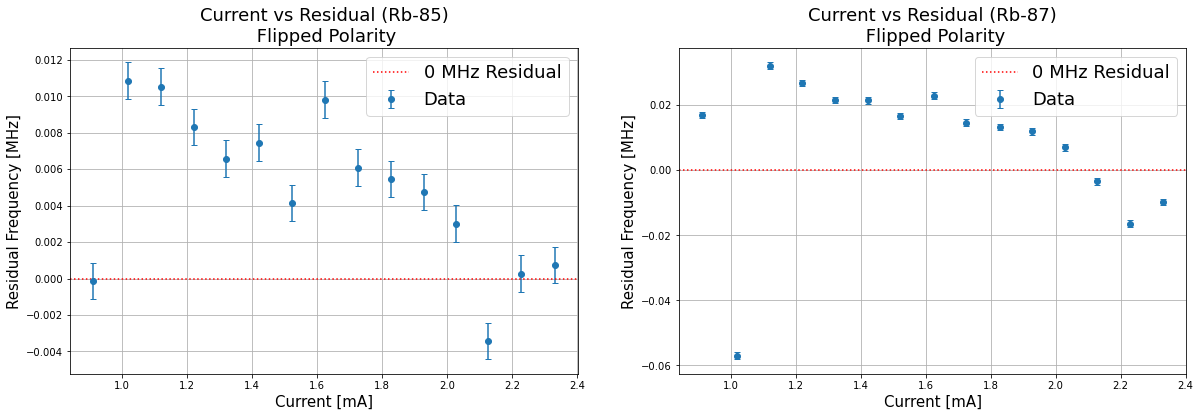

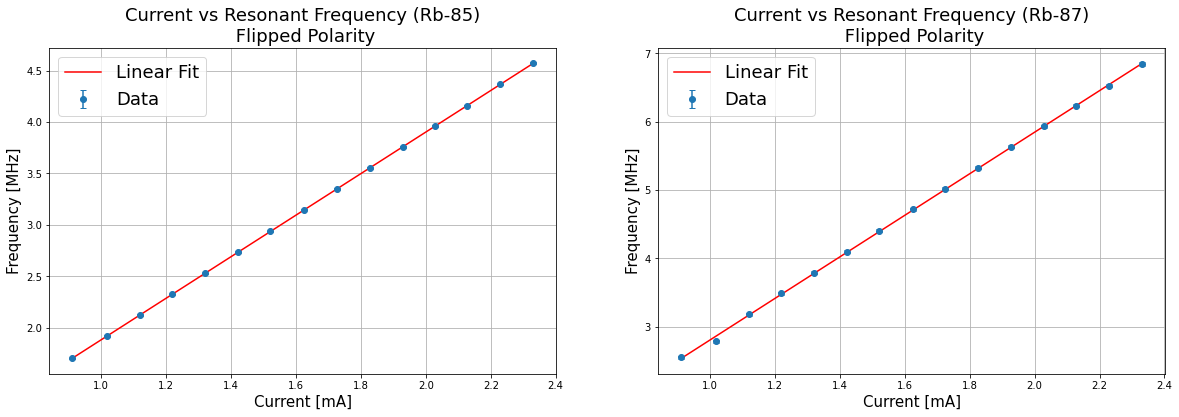

In [295]:
flip_freq85 = np.array([1.70489, 1.9206, 2.125, 2.3275, 2.5305, 2.7361, 2.9375, 3.1479, 3.3489, 3.5530, 3.7570, 3.9600, 4.1583, 4.3667, 4.5719]) #MHz
flip_volt85 = np.array([9.1185, 10.1867, 11.1971, 12.2038, 13.2055, 14.2260, 15.2201, 16.2603, 17.2530, 18.2718, 19.2860, 20.2922, 21.2762, 22.2932, 23.3128]) #mV

flip_freq87 = np.array([2.55509, 2.7892, 3.1863, 3.489, 3.7918, 4.0998, 4.4031, 4.7173, 5.0171, 5.3238, 5.6305, 5.9336, 6.2312, 6.5263, 6.8410]) #MHz
flip_volt87 = np.array([9.1147, 10.1866, 11.1967, 12.2033, 13.2033, 14.2259, 15.2201, 16.2601, 17.2526, 18.2713, 19.2852, 20.2913, 21.2753, 22.2932, 23.3125]) #mV

flip_I_85 = (flip_volt85*1e-3 / shunt_R) #Amps
flip_I_87 = (flip_volt87*1e-3 / shunt_R) #Amps

##########Fitting#########
params85, cov85 = curve_fit(line, flip_I_85, flip_freq85, sigma = np.ones(len(freq_85))*sigma_f)
params87, cov87 = curve_fit(line, flip_I_87, flip_freq87, sigma = np.ones(len(freq_85))*sigma_f)
x85 = np.linspace(flip_I_85[0], flip_I_85[14], 100)
x87 = np.linspace(flip_I_87[0], flip_I_87[14], 100)
##########################


###########CHI-SQUARE############
x85_ = np.linspace(flip_I_85[14], flip_I_85[0], 15)
x87_ = np.linspace(flip_I_87[14], flip_I_87[0], 15)
ob85 = np.array(flip_freq85)
ex85 = np.array(line(x85_, *params85))

ob87 = np.array(flip_freq87)
ex87 = np.array(line(x87_, *params87))

chi_sq85 = sum( (ob85 - ex85)**2/ex85 )
#print(chi_sq)
red_chi85 = chi_sq85/(len(freq_85) - 2)
#print(red_chi)

chi_sq87 = sum( (ob87 - ex87)**2/ex87 )
red_chi87 = chi_sq87/(len(freq_87) - 2)

print("CHI SQ:")
print("------------------------------------------------")
print(f"R-85: {chi_sq85} & {red_chi85}")
print(f"R-87: {chi_sq87} & {red_chi87}")
print("------------------------------------------------")

#################################

#########ERROR Residual#########
residual85 = np.array(flip_freq85) - line(np.linspace(flip_I_85[0], flip_I_85[14], 15), *params85)
residual87 = np.array(flip_freq87) - line(np.linspace(flip_I_87[0], flip_I_87[14], 15), *params87)

sigma_f85 = np.sqrt(sum(residual85**2)/(len(flip_freq85-2))) 
sigma_f87 = np.sqrt(sum(residual87**2)/(len(flip_freq87-2)))

print("NEW ERROR: ")
print("-----------------------------------------------")
print(f"R-85 Freq Error: {sigma_f85}")
print(f"R-87 Freq Error: {sigma_f87}")
print("-----------------------------------------------")

###########Reduced CHI-SQUARE############
x85_ = np.linspace(flip_I_85[0], flip_I_85[14], 15)
x87_ = np.linspace(flip_I_87[0], flip_I_87[14], 15)
ob85 = np.array(flip_freq85)
ex85 = np.array(line(x85_, *params85))

ob87 = np.array(flip_freq87)
ex87 = np.array(line(x87_, *params87))

chi_sq85 = sum( (ob85 - ex85)**2/sigma_f85**2 )
red_chi85 = chi_sq85/(len(freq_85) - 2)

chi_sq87 = sum( (ob87 - ex87)**2/sigma_f87**2 )
red_chi87 = chi_sq87/(len(freq_87) - 2)

print("Reduced CHI SQ:")
print("------------------------------------------------")
print(f"R-85: {chi_sq85} & {red_chi85}")
print(f"R-87: {chi_sq87} & {red_chi87}")
print("------------------------------------------------")

#################################


fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))
ax1.set_title("Current vs Residual (Rb-85)\n Flipped Polarity", fontsize = 18)
ax1.set_ylabel("Residual Frequency [MHz]", fontsize = 15)
ax1.set_xlabel("Current [mA]", fontsize = 15)
ax1.errorbar(flip_I_85, residual85, yerr = np.ones(len(freq_85))*sigma_f, fmt = "o", capsize = 3, label = "Data")
ax1.axhline(y = 0, color = 'red', ls = ":", label = "0 MHz Residual")
ax1.grid(True)
ax1.legend(fontsize = 18)

ax2.set_title("Current vs Residual (Rb-87)\n Flipped Polarity", fontsize = 18)
ax2.set_ylabel("Residual Frequency [MHz]", fontsize = 15)
ax2.set_xlabel("Current [mA]", fontsize = 15)
ax2.errorbar(flip_I_87,residual87, yerr = np.ones(len(freq_85))*sigma_f, fmt = "o", capsize = 3, label = "Data")
ax2.axhline(y = 0, color = 'red', ls = ":", label = "0 MHz Residual")
ax2.grid(True)
ax2.legend(fontsize = 18)

######################

##########Fitting AGAIN #########
params85, cov85 = curve_fit(line, flip_I_85, flip_freq85, sigma = np.ones(len(flip_freq85))*sigma_f85)
params87, cov87 = curve_fit(line, flip_I_87, flip_freq87, sigma = np.ones(len(flip_freq85))*sigma_f87)
##########################


################## Actual Plotting ################
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))
ax1.set_title("Current vs Resonant Frequency (Rb-85)\n Flipped Polarity", fontsize = 18)
ax1.set_ylabel("Frequency [MHz]", fontsize = 15)
ax1.set_xlabel("Current [mA]", fontsize = 15)
ax1.errorbar(flip_I_85, flip_freq85, yerr = np.ones(len(freq_85))*sigma_f85, fmt = "o", capsize = 3, label = "Data")
ax1.plot(x85, line(x85, *params85), color = 'red', label = "Linear Fit")
ax1.grid(True)
ax1.legend(fontsize = 18)

ax2.set_title("Current vs Resonant Frequency (Rb-87)\n Flipped Polarity", fontsize = 18)
ax2.set_ylabel("Frequency [MHz]", fontsize = 15)
ax2.set_xlabel("Current [mA]", fontsize = 15)
ax2.errorbar(flip_I_87, flip_freq87, yerr = np.ones(len(freq_85))*sigma_f87, fmt = "o", capsize = 3, label = "Data")
ax2.plot(x87, line(x87, *params87), color = 'red', label = "Linear Fit")
ax2.grid(True)
ax2.legend(fontsize = 18)

# Calculations #

### Nuclear Spin ###

NEW ERROR: 
-----------------------------------------------
R-85 Freq Error: 0.03232827892966265
R-87 Freq Error: 0.05875050241279371
-----------------------------------------------
2.6855802542398224 2.5
1.628336874037119 1.5
RESULT: 
--------------------------------------------------------------
R-85 Nuclear Spin: 2.6855802542398224 ± 0.009230125991312512
R-85 Nuclear Spin: 1.628336874037119 ± 0.007413250286567724
--------------------------------------------------------------
CHI SQ:
------------------------------------------------
R-85: 16.707342601799347 & 1.2851802001384114
R-87: 25.086930479510286 & 1.9297638830392527
------------------------------------------------
Weighted CHI SQ:
------------------------------------------------
R-85: 14.999999993675015 & 1.1538461533596165
R-87: 14.99999999747885 & 1.1538461536522193
------------------------------------------------


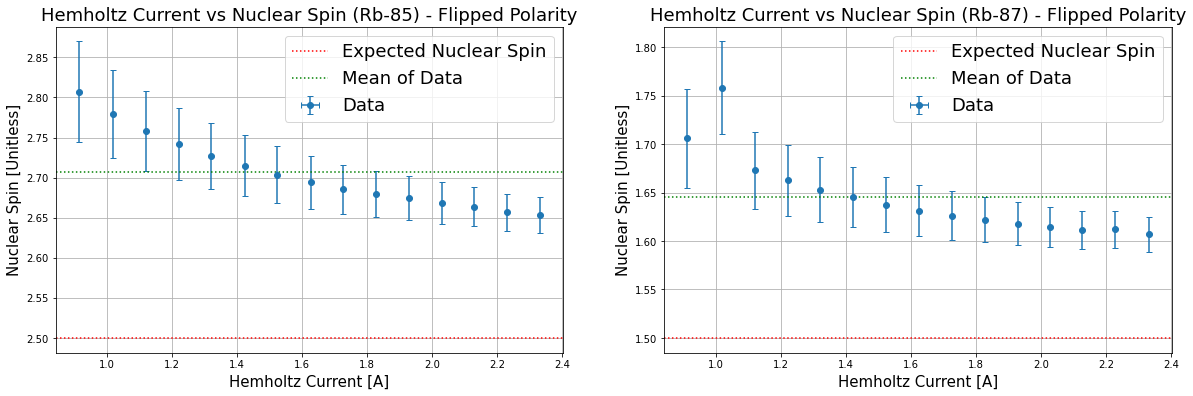

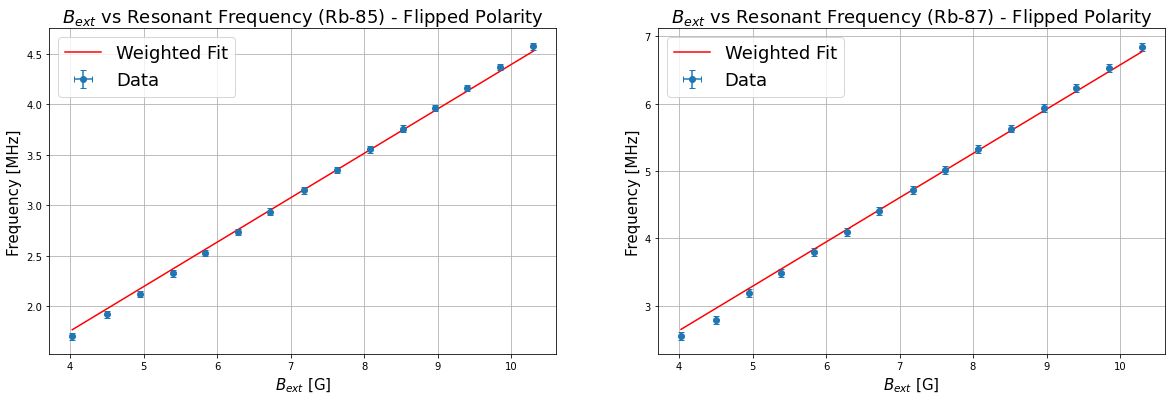

In [297]:
####### R - 85  & R - 87 ##########
sigma_f85_ = sigma_f85
sigma_f87_ = sigma_f87
const = (.9e-2)*135/(27.5e-2)
b_ext = const * current_set

b_ext85 = const * abs(flip_I_85)
b_ext87 = const * abs(flip_I_87)

nucSpin85_arr = 1/2 * ( ((2.799*b_ext85)/flip_freq85) - 1 )
nucSpin87_arr = 1/2 * ( ((2.799*b_ext87)/flip_freq87) - 1 )

sigma_hemI = .05 #amps
sigma_bext = const * sigma_hemI

v_error = 0.0005 #mV
I_error = (1/(shunt_R))*v_error*1e-3
sigma_bext2 = const * I_error


#####FITTING ##########
def nu(x, I):
    return x * (2.799/(2*I + 1))
params_85, cov_85 = curve_fit(nu, b_ext85, flip_freq85, sigma = np.ones(len(flip_freq85))*sigma_f85)
params_87, cov_87 = curve_fit(nu, b_ext87, flip_freq87, sigma = np.ones(len(flip_freq85))*sigma_f87)
x_vals85 = np.linspace(b_ext85[0], b_ext85[14], 100)
x_vals87 = np.linspace(b_ext87[0], b_ext87[14], 100)
##########################################

#########ERROR Residual#########
x_vals_85 = np.linspace(b_ext85[0], b_ext85[14], 15)
x_vals_87 = np.linspace(b_ext87[0], b_ext87[14], 15)
residual85 = np.array(flip_freq85) - nu(x_vals_85, *params_85)
residual87 = np.array(flip_freq87) - nu(x_vals_87, *params_87)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))
ax1.set_title(r"$B_{ext}$ vs Residual (Rb-85) - Flipped Polarity", fontsize = 18)
ax1.set_ylabel("Residual Frequency [MHz]", fontsize = 15)
ax1.set_xlabel(r"$B_{ext}$ [G]", fontsize = 15)
ax1.errorbar(flip_I_85, residual85, yerr = np.ones(len(flip_freq85))*sigma_f85_, fmt = "o", capsize = 3, label = "Data")
ax1.axhline(y = 0, color = 'red', ls = ":", label = "0 MHz Residual")
ax1.grid(True)
ax1.legend(fontsize = 18)

ax2.set_title(r"$B_{ext}$ vs Residual (Rb-87) - Flipped Polarity", fontsize = 18)
ax2.set_ylabel("Residual Frequency [MHz]", fontsize = 15)
ax2.set_xlabel(r"$B_{ext}$ [G]", fontsize = 15)
ax2.errorbar(flip_I_87,residual87, yerr = np.ones(len(flip_freq87))*sigma_f87_, fmt = "o", capsize = 3, label = "Data")
ax2.axhline(y = 0, color = 'red', ls = ":", label = "0 MHz Residual")
ax2.grid(True)
ax2.legend(fontsize = 18)

######################
sigma_f85 = np.sqrt(sum(residual85**2)/(len(freq_85-2)))  #np.mean(abs(residual85))
sigma_f87 = np.sqrt(sum(residual87**2)/(len(freq_87-2)))

print("NEW ERROR: ")
print("-----------------------------------------------")
print(f"R-85 Freq Error: {sigma_f85}")
print(f"R-87 Freq Error: {sigma_f87}")
print("-----------------------------------------------")

nuc_error85 = np.sqrt( (1/2*(2.799/flip_freq85))**2 * sigma_bext2**2 + (1/2*((2.799*b_ext85)/flip_freq85**2))**2 * sigma_f85**2)
nuc_error87 = np.sqrt( (1/2*(2.799/flip_freq87))**2 * sigma_bext2**2 + (1/2*((2.799*b_ext87)/flip_freq87**2))**2 * sigma_f87**2)
############################################################

####### Nuc ERROR? ######
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))
ax1.set_title(r"Hemholtz Current vs Nuclear Spin (Rb-85) - Flipped Polarity", fontsize = 18)
ax1.set_ylabel("Nuclear Spin [Unitless]", fontsize = 15)
ax1.set_xlabel(r"Hemholtz Current [A]", fontsize = 15)
ax1.errorbar(abs(flip_I_85), nucSpin85_arr, yerr = nuc_error85, xerr = np.ones(len(freq_85))*I_error, fmt = "o", capsize = 3, label = "Data")
ax1.axhline(y = 5/2, color = 'red', ls = ':', label = "Expected Nuclear Spin")
ax1.axhline(y = np.mean(nucSpin85_arr), color = 'green', ls = ':', label = "Mean of Data")
ax1.grid(True)
ax1.legend(fontsize = 18)

ax2.set_title(r"Hemholtz Current vs Nuclear Spin (Rb-87) - Flipped Polarity", fontsize = 18)
ax2.set_ylabel("Nuclear Spin [Unitless]", fontsize = 15)
ax2.set_xlabel(r"Hemholtz Current [A]", fontsize = 15)
ax2.errorbar(abs(flip_I_87),nucSpin87_arr, yerr = nuc_error87, xerr = np.ones(len(freq_85))*I_error, fmt = "o", capsize = 3, label = "Data")
ax2.axhline(y = 3/2, color = 'red', ls = ':', label = "Expected Nuclear Spin")
ax2.axhline(y = np.mean(nucSpin87_arr), color = 'green', ls = ':', label = "Mean of Data")
ax2.grid(True)
ax2.legend(fontsize = 18)

#####FITTING AGAIN##########
def nu(x, I):
    return x * (2.799/(2*I + 1))
params_85, cov_85 = curve_fit(nu, b_ext85, flip_freq85, sigma = np.ones(len(flip_freq85))*sigma_f85)
params_87, cov_87 = curve_fit(nu, b_ext87, flip_freq87, sigma = np.ones(len(flip_freq87))*sigma_f87)
#####################################

#################### PLOTTING NUC FIT STUFF ###################
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))
ax1.set_title(r"$B_{ext}$ vs Resonant Frequency (Rb-85) - Flipped Polarity", fontsize = 18)
ax1.set_ylabel("Frequency [MHz]", fontsize = 15)
ax1.set_xlabel(r"$B_{ext}$ [G]", fontsize = 15)
ax1.errorbar(b_ext85, flip_freq85, yerr = np.ones(15)*sigma_f85, xerr = np.ones(len(flip_freq85))*sigma_bext2, fmt = "o", capsize = 3, label = "Data")
ax1.plot(x_vals85, nu(x_vals85, *params_85), color = 'red', label = "Weighted Fit")
ax1.grid(True)
ax1.legend(fontsize = 18)

ax2.set_title(r"$B_{ext}$ vs Resonant Frequency (Rb-87) - Flipped Polarity", fontsize = 18)
ax2.set_ylabel("Frequency [MHz]", fontsize = 15)
ax2.set_xlabel(r"$B_{ext}$ [G]", fontsize = 15)
ax2.errorbar(b_ext87,flip_freq87, yerr = np.ones(15)*sigma_f87, xerr = np.ones(len(flip_freq87))*sigma_bext2, fmt = "o", capsize = 3, label = "Data")
ax2.plot(x_vals87, nu(x_vals87, *params_87), color = 'red', label = "Weighted Fit")
ax2.grid(True)
ax2.legend(fontsize = 18)

print(*params_85, 5/2)
print(*params_87, 3/2)

print("RESULT: ")
print('--------------------------------------------------------------')
print(f"R-85 Nuclear Spin: {params_85[0]} ± {np.sqrt(cov_85[0][0])}")
print(f"R-85 Nuclear Spin: {params_87[0]} ± {np.sqrt(cov_87[0][0])}")
print('--------------------------------------------------------------')
#########################################

###########CHI-SQUARE############
x_vals_ = np.linspace(b_ext[14], b_ext[0], 15)
ob85 = np.array(flip_freq85)
ex85 = np.array(nu(x_vals_, *params_85))

ob87 = np.array(flip_freq87)
ex87 = np.array(nu(x_vals_, *params_87))

chi_sq85 = sum( (ob85 - ex85)**2/ex85 )
red_chi85 = chi_sq85/(len(freq_85) - 2)

chi_sq87 = sum( (ob87 - ex87)**2/ex87 )
red_chi87 = chi_sq87/(len(freq_87) - 2)

print("CHI SQ:")
print("------------------------------------------------")
print(f"R-85: {chi_sq85} & {red_chi85}")
print(f"R-87: {chi_sq87} & {red_chi87}")
print("------------------------------------------------")

#################################

###########Weighted CHI-SQUARE############
x_vals_85 = np.linspace(b_ext85[0], b_ext85[14], 15)
x_vals_87 = np.linspace(b_ext87[0], b_ext87[14], 15)
ob85 = np.array(flip_freq85)
ex85 = np.array(nu(x_vals_85, *params_85))

ob87 = np.array(flip_freq87)
ex87 = np.array(nu(x_vals_87, *params_87))

chi_sq85 = sum( (ob85 - ex85)**2/sigma_f85**2 )
red_chi85 = chi_sq85/(len(freq_85) - 2)

chi_sq87 = sum( (ob87 - ex87)**2/sigma_f87**2 )
red_chi87 = chi_sq87/(len(freq_87) - 2)

print("Weighted CHI SQ:")
print("------------------------------------------------")
print(f"R-85: {chi_sq85} & {red_chi85}")
print(f"R-87: {chi_sq87} & {red_chi87}")
print("------------------------------------------------")

#################################


### Magnetic Field ###

In [298]:
######## R - 85 #########
y_int85 = params85[1]
y_int85_err = np.sqrt(cov85[1][1])
nucSpin85 = 5/2
B_earth85 = y_int85*(2*nucSpin85 + 1) /2.799 #G
B85_err = y_int85_err *(2*nucSpin85 + 1) /2.799
print(f"R-85: magnetic field of earth for Rb-85 is {B_earth85} ± {B85_err} Gauss")
print()
######## R - 87 #############
y_int87 = params87[1]
y_int87_err = np.sqrt(cov87[1][1])
nucSpin87 = 3/2
B_earth87 = y_int87*(2*nucSpin87 + 1) /2.799 #G
B87_err = y_int87_err *(2*nucSpin87 + 1) /2.799
print(f"R-87: magnetic field of earth for Rb-85 is {B_earth87} ± {B87_err} Gauss")


R-85: magnetic field of earth for Rb-85 is -0.29195500539799646 ± 0.001962388546893034 Gauss

R-87: magnetic field of earth for Rb-85 is -0.3293208474609699 ± 0.033078258885993486 Gauss


## Magnetic Field for RF Off at i = 0.065 Amps ##

In [301]:
#######Earth B Field with RF turned off: #######
rfOff_current = 0.065 #amps
bEarth_rfOff = .9e-2 * (135*rfOff_current/(27.5e-2))
amp_error = 0.005
b_rfOff_error = .9e-2 * (135*amp_error/(27.5e-2))
print(f"With RF turned off earth b field is {bEarth_rfOff} ± {b_rfOff_error}")

With RF turned off earth b field is 0.28718181818181815 ± 0.022090909090909088


## Magnetic Field for 0 DC Current ##

In [304]:
def mag(v, I):
    error = 0.001 #MHz 1 kHz
    
    return v* ((2*I + 1)/2.799), error* ((2*I + 1)/2.799) #G

print(f"R-85 0DC Current B-Field: {mag(.165770, 5/2)[0]} ± {mag(.164, 5/2)[1]}")
print(f"R-87 0DC Current B-Field: {mag(.2413, 3/2)[0]} ± {mag(.2413, 3/2)[1]}")


R-85 0DC Current B-Field: 0.35534833869239013 ± 0.0021436227224008574
R-87 0DC Current B-Field: 0.34483744194355126 ± 0.001429081814933905
